## X-ray reflectivity calculations (2 layers)

Let us suppose that we want to calculate the expected x-ray reflectivity for a couple of layers (Fe/Au) on Silicon. We start by importing anaklasis.ref

In [1]:
from anaklasis import ref

We name the project as _2layers_

In [2]:
project='2layers'

We define the model _list_ containing the data for the semi-infine fronting layer #0 (air), semi-infine backing layer #3 (Si) and the two layers Fe and Au. Note that Real and Imaginary sld values are in 1/Angstrom^2 and thickness/roughness values in Angstrom.

In [3]:
model=[
	#  Re_sld  Im_sld   thk rough solv description
	[ 0.00e-5, 0.00e-7,  0 , 3.0, 0.0, 'air'],
	[ 12.4e-5, 1.28e-5, 50,  3.0, 0.0, 'Au'],
	[ 5.94e-5, 7.69e-6, 40 , 3.0, 0.0, 'Fe'],
	[ 2.00e-5, 4.58e-7,  0 , 0.0, 0.0, 'Si'],
	]

Since we have a single patch(model) that completery covers the substrate, we define the _system_ and _patch_ _lists_ as

In [4]:
patches=[1.0]
system=[model]

No global parameters are needed in this example, so the related _list_ is empty.

In [5]:
global_param = []

We now fill the instrumental parameters in the relevant _lists_.

In [6]:
resolution=[0.001]
background = [1.0e-9]
scale = [1.0]
qmax = [0.7]

and finally we call the _ref.calculate_ function, and we store the results (reflectivity, sld profile, solvent volume fraction profile) in the dictionary _results_

--------------------------------------------------------------------
Program ANAKLASIS - Calculation Module for X-ray/Neutron reflection 
version 1.3, June 2021
developed by Dr. Alexandros Koutsioumpas. JCNS @ MLZ
for bugs and requests contact: a.koutsioumpas[at]fz-juelich.de
--------------------------------------------------------------------


Instrumental Resolution, dQ/Q: 0.001
--------------------------------------------------------------------
air real sld (10^-6 A^-2)      = 0.00 
air imaginary sld (10^-6 A^-2) = 0.00 
air thickness (A)              = 0.00 
air/Au roughness (A) = 3.00 
air solvent volume fraction    = 0.00 
--------------------------------------------------------------------
Au real sld (10^-6 A^-2)      = 124.00 
Au imaginary sld (10^-6 A^-2) = 12.80 
Au thickness (A)              = 50.00 
Au/Fe roughness (A) = 3.00 
Au solvent volume fraction    = 0.00 
--------------------------------------------------------------------
Fe real sld (10^-6 A^-2)      = 59.40 


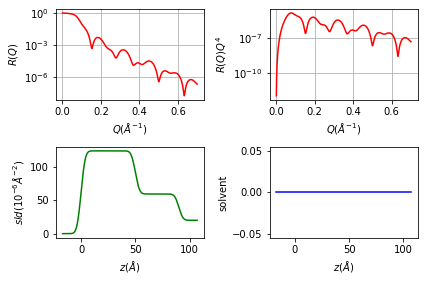

Library versions used for the calculations:
numpy: 1.19.4
scipy: 1.5.4
numdifftools: 0.9.39
sympy: 1.7.1


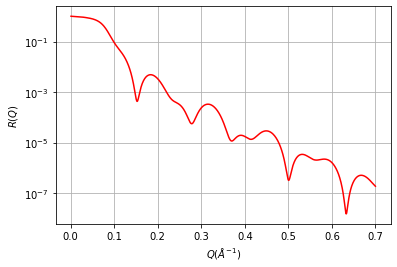

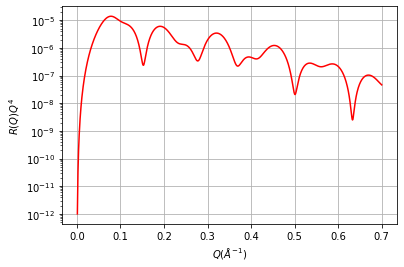

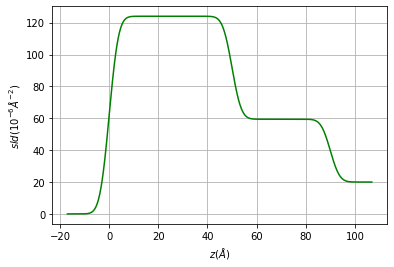

In [7]:
results = ref.calculate(project, resolution, 
	patches, system, global_param, 
	background, scale, qmax, plot=True)

So we get a summary of the system's parameters and a graphical output of the reflectivity and related profiles. If we want we may also use the _results_ _dictionary_ to further inspect fot example the calculated reflectivity.

In [8]:
print(results[("reflectivity")])

[[1.00000000e-03 9.97074625e-01 9.97074625e-13]
 [1.69900000e-03 9.95156953e-01 8.29211081e-12]
 [2.39800000e-03 9.93241521e-01 3.28436626e-11]
 ...
 [6.98602000e-01 2.02004096e-07 4.81148875e-08]
 [6.99301000e-01 1.96420829e-07 4.69725500e-08]
 [7.00000000e-01 1.91119885e-07 4.58878844e-08]]


or check the calculated sld profile

In [9]:
print(results[("profile")])

[[-1.70000000e+01  9.02733649e-13]
 [-1.68760000e+01  1.14793059e-12]
 [-1.67520000e+01  1.45730196e-12]
 ...
 [ 1.06628000e+02  2.00000006e-05]
 [ 1.06752000e+02  2.00000005e-05]
 [ 1.06876000e+02  2.00000004e-05]]
